## Data Understanding and Basic Modeling Python Notebook.



First thing we will do is to load and explore the data.
<br> - The data is loaded from SQLite.

In [38]:
# Read data from sqllite database which has all the csv files dumped earlier.
import sqlite3
import pandas as pd
import numpy as np
conn = sqlite3.connect("C:\Users\Amandeep\pluralsight.db")

user_assessment_scores = pd.read_sql_query("select * from user_assessment_scores;", conn)
user_course_views = pd.read_sql_query("select * from user_course_views;", conn)
course_tags = pd.read_sql_query("select * from course_tags;", conn)
user_interests = pd.read_sql_query("select * from user_interests;", conn)

# Close connection of sqlite. Always remember to close the connection!
conn.close()

Let's view how the data looks like. Normally the data has problems either on it's head or tail! We will see the 4 head and 4 tail rows of each table.

In [39]:
from IPython.display import display, HTML

print("User Assessments : Dims = " + str(user_assessment_scores.shape))
display(user_assessment_scores.head(4))
display(user_assessment_scores.tail(4))

print("\nUser Course Views : Dims = " + str(user_course_views.shape))
display(user_course_views.head(4))
display(user_course_views.tail(4))

print("\nCourse Tags : Dims = " + str(course_tags.shape))
display(course_tags.head(4))
display(course_tags.tail(4))

print("\nUser Interests : Dims = " + str(user_interests.shape))
display(user_interests.head(4))
display(user_interests.tail(4))

User Assessments : Dims = (6571, 4)


,user_handle,assessment_tag,user_assessment_date,user_assessment_score
0,7487,angular-js,2017-08-11 19:03:38,134
1,7487,css,2017-08-11 20:09:56,38
2,7487,html5,2017-07-31 18:59:37,84
3,7487,java,2017-07-31 18:49:27,149


,user_handle,assessment_tag,user_assessment_date,user_assessment_score
6567,8887,angular-js,2016-09-30 22:30:48,221
6568,8887,docker,2017-03-24 17:55:06,148
6569,8887,html5,2017-02-10 16:38:53,241
6570,4440,c-sharp,2017-09-04 15:58:48,126



User Course Views : Dims = (249238, 6)


,user_handle,view_date,course_id,author_handle,level,view_time_seconds
0,1,2017-06-27,cpt-sp2010-web-designers-branding-intro,875,Beginner,3786
1,1,2017-06-28,cpt-sp2010-web-designers-branding-intro,875,Beginner,1098
2,1,2017-06-28,cpt-sp2010-web-designers-css,875,Intermediate,4406
3,1,2017-07-27,cpt-sp2010-web-designers-css,875,Intermediate,553


,user_handle,view_date,course_id,author_handle,level,view_time_seconds
249234,9999,2017-10-14,python-getting-started,104,Beginner,1612
249235,10000,2017-08-18,apex-absolute-beginner-guide-coding-salesforce,229,Beginner,402
249236,10000,2017-08-21,apex-absolute-beginner-guide-coding-salesforce,229,Beginner,9500
249237,10000,2017-08-21,apex-fundamental-coding,229,Beginner,1659



Course Tags : Dims = (11337, 2)


,course_id,course_tags
0,12-principles-animation-toon-boom-harmony-1475,2d-animation
1,2d-racing-game-series-unity-5-1312,game-design
2,2d-racing-games-unity-volume-2-1286,game-art
3,2d-racing-games-unity-volume-2-1286,digital-painting


,course_id,course_tags
11333,z-os-mainframe-introduction,mainframe
11334,z-os-tso-ispf-environment-introduction,mainframe
11335,zsphere-modeling-zbrush-3505,3d-modeling
11336,zsphere-modeling-zbrush-3505,3d-sculpting



User Interests : Dims = (297526, 3)


,user_handle,interest_tag,date_followed
0,1,mvc-scaffolding,2017-06-27 16:26:52
1,1,mvc2,2017-06-27 16:26:52
2,1,mvc-html-helpers,2017-06-27 16:26:52
3,1,mvc4-ioc,2017-06-27 16:26:52


,user_handle,interest_tag,date_followed
297522,10000,salesforce,2017-08-14 14:56:57
297523,10000,sql,2017-08-14 14:56:57
297524,10000,java,2017-08-14 14:56:57
297525,10000,c#,2017-08-14 14:56:57


Lets see if we have any missing values in the data.

In [ ]:
print(user_assessment_scores.isna().sum() + user_assessment_scores.isnull().sum())
print(user_course_views.isnull().sum() + user_course_views.isna().sum())
print(course_tags.isnull().sum() + course_tags.isna().sum())
print(user_interests.isnull().sum() + user_interests.isna().sum())

Great, There are no missing values. Next step will be checking the datatypes and casting to correct datatypes if we need to. 

In [40]:
# Lets update the datatypes.
print("Before = " + str(user_assessment_scores.dtype))
user_assessment_scores['user_assessment_score'] = pd.to_numeric(user_assessment_scores['user_assessment_score'])
user_assessment_scores['user_assessment_date'] = pd.to_datetime(user_assessment_scores['user_assessment_score'])
print("After = " + str(user_assessment_scores.dtype))

print("Before = " + str(user_course_views.dtype))
user_course_views['view_time_seconds'] = pd.to_numeric(user_course_views['view_time_seconds'])
user_course_views['view_date'] = pd.to_datetime(user_course_views['view_date'])
print("After = " + str(user_course_views.dtype))

print("Before = " + str(user_interests.dtype))
user_interests['date_followed'] = pd.to_datetime(user_interests['date_followed'])
print("After = " + str(user_interests.dtype))

The data looks pretty much clean! *I am happy!* :) <br>
There is no missing data, hence we don't have to deal with any missing data cases for now.
<br>- Lets get rid of duplicate rows from the data. <br>- Next lets see if when we have all the data for users in interest and course view table

In [42]:
# We have some rows which are duplicate. Lets get rid of those rows, 
# so that we can train our model only once on one training set.

if(user_assessment_scores.drop_duplicates().shape[0] != user_assessment_scores.shape[0]):
    user_assessment_scores = user_assessment_scores.drop_duplicates()
    print("Duplicates in user assessment scores df removed")
    
if(user_course_views.drop_duplicates().shape[0] != user_course_views.shape[0]):
    user_course_views = user_course_views.drop_duplicates()
    print("Duplicates in user course views df removed")

if(course_tags.drop_duplicates().shape[0] != course_tags.shape[0]):
    course_tags = course_tags.drop_duplicates()
    print("Duplicates in course tags df removed")

if(user_interests.drop_duplicates().shape[0] != user_interests.shape[0]):
    user_interests = user_interests.drop_duplicates()
    print("Duplicates in user interest df removed")

Duplicates in user interest df removed


Next let us collect all user ids. We will use this all users df to find users who have missing interests, course views, or assessments!<br> Similarly, we will also find the courses with missing tags but has user course view!

In [43]:
unique_users_in_assessment = user_assessment_scores['user_handle'].drop_duplicates()
unique_users_in_course_view = user_course_views['user_handle'].drop_duplicates()
unique_users_interests = user_interests['user_handle'].drop_duplicates()

unique_users = pd.concat([unique_users_in_assessment, unique_users_interests, unique_users_in_course_view]).drop_duplicates()
print(unique_users.head())
print(unique_users.shape[0])

0    7487
6    7407
7    3600
8    8152
9    3637
Name: user_handle, dtype: object
10000


In [44]:
unique_courses_in_course_view = user_course_views['course_id'].drop_duplicates()
unique_courses_in_course_tags = course_tags['course_id'].drop_duplicates()
unique_courses = pd.concat([unique_courses_in_course_view, unique_courses_in_course_tags]).drop_duplicates()
print(unique_courses.head())
print(unique_courses.shape[0])

0           cpt-sp2010-web-designers-branding-intro
2                      cpt-sp2010-web-designers-css
4    aws-certified-solutions-architect-professional
5              aws-certified-sysops-admin-associate
6                     aws-system-admin-fundamentals
Name: course_id, dtype: object
5942


We have found that there are 10000 users and 5942 courses in the system. Lets also grab unique course tags, interest tags, and assessment tags.

In [45]:
unqiue_course_tags = course_tags['course_tags'].drop_duplicates()
print(unqiue_course_tags.head())
print(unqiue_course_tags.shape[0])

unqiue_assessment_tags = user_assessment_scores['assessment_tag'].drop_duplicates()
print(unqiue_assessment_tags.head())
print(unqiue_assessment_tags.shape[0])

unique_interest_tags = user_interests['interest_tag'].drop_duplicates()
print(unique_interest_tags.head())
print(unique_interest_tags.shape[0])

all_tags = pd.concat([unqiue_course_tags, unqiue_assessment_tags, unique_interest_tags]).drop_duplicates()
print("Total number of tags : " + str(all_tags.shape[0]))

0        2d-animation
1         game-design
2            game-art
3    digital-painting
4       image-editing
Name: course_tags, dtype: object
999
0    angular-js
1           css
2         html5
3          java
4    javascript
Name: assessment_tag, dtype: object
54
0     mvc-scaffolding
1                mvc2
2    mvc-html-helpers
3            mvc4-ioc
4         mvc-testing
Name: interest_tag, dtype: object
748
Total number of tags : 1191


Results show that we have 999 unique course tags, 54 assessment tags, and 748 interest tags! The total tags are 1191 which means we have some tags common.

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['patch.force_edgecolor']=True
user_assessment_scores.dtypes

user_handle                      object
assessment_tag                   object
user_assessment_date     datetime64[ns]
user_assessment_score             int64
dtype: object

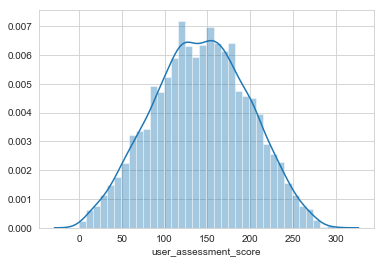

In [47]:
# Plot the assessment scores
sns.distplot(user_assessment_scores['user_assessment_score'])

#### Let's start to create some similarity measure and evalute KNN
We will start by creating similarity for users based on their assessments.
We will create a class that takes in the dataframe, value columns, and index column to return top users based on SVD, Cosine, and Pearson similarity.

In [148]:
TOP_CUTOFF_USERS = 10

# Class for similarity measure.
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

class SimilarityMeasure:
    def __initialize_matrix(self):
        if self.__values_column is None:
            self.__dataframe['temp_val'] = 1
            self.__values_column = 'temp_val'
        self.__scores_matrix = self.__dataframe.pivot(index = self.__index_column, columns= self.__columns_column, 
                                            values = self.__values_column)
        self.__scores_matrix = self.__scores_matrix.fillna(0)
        self.index_values = self.__scores_matrix.index.values
        # we need reindexed to calclulate the cosine similarities
        self.__reindexed_scores_matrix = self.__scores_matrix.copy()
        self.__reindexed_scores_matrix.index = range(0, self.index_values.shape[0])
        self.pearson_similarity_martix = None
        self.cosine_similarities_matrix = None
        self.__sliced = None
    
    def calculate_pearson_similarity(self):
        self.pearson_similarity_martix = self.__scores_matrix.T.corr(method = 'pearson')
        print("Pearson similarity calculated!")
        
    # Function that taken in user handle as input and outputs most similar users based on pearson.
    def get_pearson_similar_users(self, user_handle):
        if not self.isValidUser(user_handle):
            return("Error - User not found!!")
        if self.pearson_similarity_martix is not None:
            user_handle_scores = self.pearson_similarity_martix[user_handle]
            similar_users = user_handle_scores.sort_values(ascending = False)[1:TOP_CUTOFF_USERS]
            return similar_users
        else :
            print("Error - Pearson similarity not calculated!!!!")
    
    # Function to calculate cosine similarity.
    def calculate_cosine_similarity(self):
        A_sparse = sparse.csr_matrix(self.__reindexed_scores_matrix)
        self.cosine_similarities_matrix = cosine_similarity(A_sparse, dense_output = False)
        print("Cosine similarity calculated!")
    
    # Function that taken in user handle as input and outputs most similar users based on pearson.
    def get_cosine_similar_users(self, user_handle):
        if not self.isValidUser(user_handle):
            return("Error - User not found!!")
        if self.cosine_similarities_matrix is not None:
            idx = np.where(self.index_values == user_handle)
            print(idx)
            scores = pd.DataFrame(self.cosine_similarities_matrix[idx].T.toarray(), index = self.index_values)
            similar_users = scores.sort_values(by=[0], ascending = False)[1:TOP_CUTOFF_USERS]
            return similar_users
        else :
            print("Error - Cosine similarity not caclculated!!!!")
        
    def calculate_svd_similarity(self, full_matrix = False, dim_size = 20):
        scores_mean = np.asarray([(np.mean(self.__reindexed_scores_matrix, 1))]).T
        normalised_mat = self.__reindexed_scores_matrix - scores_mean
        A = normalised_mat.T #/ np.sqrt(self.__reindexed_scores_matrix.shape[0] - 1)
        
        # Using svd
        U, S, V = np.linalg.svd(A, full_matrices = full_matrix)
        #Reducing the dimensions
        self.__sliced = V.T[:, :dim_size]
        self.__magnitude = np.sqrt(np.einsum('ij, ij -> i', self.__sliced, self.__sliced))
        
        #A_k = U[:, :dim_size] * np.diag(S[:dim_size]) * V[:dim_size, :]
        dim_size = 1000
        # re_create and check MSE to see if it worked!
        S_k = np.diag(S[:dim_size])
        U_k = U[:, :dim_size]
        V_k = V[:dim_size, ]
        A_k = np.dot(np.dot(U_k, S_k), V_k) + scores_mean.T
        from sklearn.metrics import mean_squared_error
        mse = mean_squared_error(A, A_k)
        print(mse)
        print("SVD similarity calculated!")

        
    def get_svd_similar_users(self, user_handle):
        if not self.isValidUser(user_handle):
            return("Error - User not found!!")
        if self.__sliced is not None:
            index = np.where(self.index_values == user_handle)[0][0] # we need index as int not array
            user_row = self.__sliced[index, :]
            similarity = np.dot(user_row, self.__sliced.T) / (self.__magnitude[index] * self.__magnitude)
            scores = pd.DataFrame(similarity, index = self.index_values)
            similar_users = scores.sort_values(by=[0], ascending = False)[1:TOP_CUTOFF_USERS]
            return similar_users
        else :
            print("Error - SVD Similarity not calculated!!!!")
    
    def isValidUser(self, user_handle):
        return ((self.index_values == user_handle).sum() > 0)
    
    def __init__(self, parameters):
        self.__dataframe = parameters['dataframe'].copy()
        self.__index_column = parameters['index_column']
        # The column in dataframe which will be used to created columns in matrix
        self.__columns_column = parameters['columns_column']
        if 'values_column' in parameters:
            self.__values_column = parameters['values_column']
        else:
            self.__values_column = None
        self.__initialize_matrix()

        
user_assessment_similarity_measure = SimilarityMeasure({
                                'dataframe' : user_assessment_scores,
                                'index_column' : 'user_handle', 'columns_column' : 'assessment_tag',
                                'values_column' : 'user_assessment_score'
                                })
user_assessment_similarity_measure.calculate_cosine_similarity()
user_assessment_similarity_measure.calculate_svd_similarity()

Cosine similarity calculated!
737.8135814726239
SVD similarity calculated!


In [112]:
user_assessment_scores.columns

Index([u'user_handle', u'assessment_tag', u'user_assessment_date',
       u'user_assessment_score'],
      dtype='object')

In [135]:
user_assessment_similarity_measure = SimilarityMeasure({
                                'dataframe' : user_assessment_scores,
                                'index_column' : 'user_handle', 'columns_column' : 'assessment_tag',
                                'values_column' : 'user_assessment_score'
                                })
user_assessment_similarity_measure.calculate_cosine_similarity()
user_assessment_similarity_measure.calculate_svd_similarity()

Cosine similarity calculated!


ValueError: shapes (54,54) and (20,3114) not aligned: 54 (dim 1) != 20 (dim 0)

In [131]:
print(user_assessment_similarity_measure.get_cosine_similar_users('8887'))
print(user_assessment_similarity_measure.get_svd_similar_users('8887'))

(array([2752], dtype=int64),)
             0
9460  0.841721
8412  0.789517
5236  0.788519
5694  0.766058
1494  0.763504
4048  0.729360
840   0.709927
9177  0.703223
7997  0.696422
             0
8412  0.872304
5694  0.792410
5236  0.774964
9460  0.767698
840   0.758704
9177  0.752271
1494  0.748666
7246  0.746476
7997  0.744728


C:\Python27\lib\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in divide


In [68]:
user_interests.columns

Index([u'user_handle', u'interest_tag', u'date_followed'], dtype='object')

In [92]:
user_interest_similarity_measure = SimilarityMeasure({
                                'dataframe' : user_interests[['user_handle', 'interest_tag']].drop_duplicates(),
                                'index_column' : 'user_handle', 'columns_column' : 'interest_tag'
                                })
user_interest_similarity_measure.calculate_cosine_similarity()
user_interest_similarity_measure.calculate_svd_similarity(dim_size = 100)

Cosine similarity calculated!


In [93]:
print(user_interest_similarity_measure.get_cosine_similar_users('8887'))
print(user_interest_similarity_measure.get_svd_similar_users('8887'))

(array([8764], dtype=int64),)
             0
4616  0.928571
1090  0.925820
8595  0.902007
3576  0.897085
2616  0.897085
6701  0.894427
7809  0.887244
6581  0.887244
3327  0.877328
             0
1090  0.786731
7809  0.772661
4616  0.621427
8791  0.617061
9662  0.608915
9188  0.589792
6547  0.580396
271   0.535104
8146  0.524825


In [69]:
print(user_course_views.columns)
print(course_tags.columns)

Index([u'user_handle', u'view_date', u'course_id', u'author_handle', u'level',
       u'view_time_seconds'],
      dtype='object')
Index([u'course_id', u'course_tags'], dtype='object')


In [207]:
user_courses_merge = pd.merge(left = user_course_views, right = course_tags, on = ['course_id'])
grouped_users_course_tags = user_courses_merge[['user_handle', 'course_tags', 'view_time_seconds']]\
                                .groupby(['user_handle', 'course_tags'])
meaned_group_user_courses_tag = grouped_users_course_tags.agg('mean').reset_index()
user_courseview_tag_similarity_measure = SimilarityMeasure({
                                'dataframe' : meaned_group_user_courses_tag[['user_handle', 'course_tags', 
                                                                             'view_time_seconds']],
                                'index_column' : 'user_handle', 'columns_column' : 'course_tags',
                                'values_column' : 'view_time_seconds'
                                })
user_courseview_tag_similarity_measure.calculate_svd_similarity()
user_courseview_tag_similarity_measure.calculate_cosine_similarity()

In [87]:
print(user_courseview_tag_similarity_measure.get_cosine_similar_users('8887'))
print(user_courseview_tag_similarity_measure.get_svd_similar_users('8887'))

(array([7684], dtype=int64),)
             0
9572  0.464560
9714  0.440287
7077  0.440287
5943  0.440287
4550  0.440287
5255  0.438963
3482  0.437138
2509  0.428516
3923  0.427342
             0
9120  0.823465
5111  0.823465
835   0.823465
4031  0.823465
8406  0.823465
2719  0.823465
8465  0.802641
2060  0.802641
2010  0.802641


In [212]:
grouped_users_courses = user_course_views[['user_handle', 'course_id', 'view_time_seconds']]\
                                .groupby(['user_handle', 'course_id'])
meaned_group_users_courses = grouped_users_courses.agg('mean').reset_index()
user_courseview_similarity_measure = SimilarityMeasure({
                                'dataframe' : meaned_group_users_courses[['user_handle', 'course_id', 'view_time_seconds']],
                                'index_column' : 'user_handle', 'columns_column' : 'course_id',
                                'values_column' : 'view_time_seconds'
                                })
user_courseview_similarity_measure.calculate_cosine_similarity()
user_courseview_similarity_measure.calculate_svd_similarity(dim_size = 150)

In [95]:
print(user_courseview_similarity_measure.get_cosine_similar_users('8887'))
print(user_courseview_similarity_measure.get_svd_similar_users('8887'))

(array([7684], dtype=int64),)
             0
7077  0.608958
9714  0.608958
4550  0.608958
5255  0.608040
3482  0.604645
4240  0.582781
6806  0.574705
9241  0.544273
9572  0.522031
             0
3482  0.816961
4240  0.816506
9714  0.816489
4550  0.816489
7077  0.816489
5255  0.816479
6806  0.815627
9241  0.815276
5425  0.812940


In [164]:
from surprise import KNNBaseline
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV


reader = Reader(rating_scale=(0, 300))
data = Dataset.load_from_df(user_assessment_scores[['user_handle', 'assessment_tag', 'user_assessment_score']], reader)

# We'll use the famous SVD algorithm.
sim_options = {'name': 'pearson_baseline', 'user_based': False}
algo = KNNBaseline(sim_options=sim_options)

gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9167


0.9166585817951671

In [272]:
algo.get_neighbors(400, k=10)
algo.sim

array([[1.        , 0.26153846, 0.27586207, ..., 0.375     , 1.        ,
        0.375     ],
       [0.26153846, 1.        , 0.33333333, ..., 0.42857143, 0.41666667,
        0.5       ],
       [0.27586207, 0.33333333, 1.        , ..., 0.5       , 0.5       ,
        0.45454545],
       ...,
       [0.375     , 0.42857143, 0.5       , ..., 1.        , 1.        ,
        0.1875    ],
       [1.        , 0.41666667, 0.5       , ..., 1.        , 1.        ,
        0.09090909],
       [0.375     , 0.5       , 0.45454545, ..., 0.1875    , 0.09090909,
        1.        ]])

In [184]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(0, 300))
data = Dataset.load_from_df(user_assessment_scores[['user_handle', 'assessment_tag', 'user_assessment_score']], reader)

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
sim_options = {'name': 'pearson_baseline', 'user_based': False}
algo = KNNWithMeans()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9618


0.9617506221472545

In [194]:
algo.get_neighbors(400, k=10)
algo.sim

array([[1.        , 0.26153846, 0.27586207, ..., 0.375     , 1.        ,
        0.375     ],
       [0.26153846, 1.        , 0.33333333, ..., 0.42857143, 0.41666667,
        0.5       ],
       [0.27586207, 0.33333333, 1.        , ..., 0.5       , 0.5       ,
        0.45454545],
       ...,
       [0.375     , 0.42857143, 0.5       , ..., 1.        , 1.        ,
        0.1875    ],
       [1.        , 0.41666667, 0.5       , ..., 1.        , 1.        ,
        0.09090909],
       [0.375     , 0.5       , 0.45454545, ..., 0.1875    , 0.09090909,
        1.        ]])

In [195]:
reader = Reader(rating_scale=(0, 300))
data = Dataset.load_from_df(user_assessment_scores[['user_handle', 'assessment_tag', 'user_assessment_score']], reader)

benchmark = []
sim_options = {'name': 'pearson_baseline'}
for algorithm in [KNNBaseline(sim_options = sim_options), KNNBasic(sim_options = sim_options), KNNWithMeans(), KNNWithZScore()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv = 10, verbose=False)

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [210]:
def findOptimalKNNAlgorithm(dataframe, user_column, item_column, score_column):
    """This method takes in a dataframe and the columns of user, item, and score. 
        This method will optimize for different KNN algorithms by using 10 fold CV and prints the results."""
    
    reader = Reader(rating_scale=(dataframe[score_column].min(), dataframe[score_column].max()))
    data = Dataset.load_from_df(dataframe[[user_column, item_column, score_column]], reader)
    
    benchmark = []
    
    # we use pearson baseline beacuse unlike other meausures it does not consider only common values.
    # https://surprise.readthedocs.io/en/stable/similarities.html#surprise.similarities.pearson_baseline
    sim_options = {'name': 'pearson_baseline'}
    
    # We are only using KNN algorithm here because similarity measure and getting neighbors is used by only these algorithms
    algorithms = [KNNBaseline(sim_options = sim_options), KNNBasic(sim_options = sim_options), 
                  KNNWithMeans(), KNNWithZScore()]
    for algorithm in algorithms:
        # Perform cross validation. Number of folds = 10. We are using RMSE as performance measure
        results = cross_validate(algorithm, data, measures=['RMSE'], cv = 10, verbose=False)

        # Get results & append algorithm name
        tmp = pd.DataFrame.from_dict(results).mean(axis=0)
        tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
        benchmark.append(tmp)
    print(pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse'))

We will find optimal values for each of the similarities we are finding.

In [215]:
findOptimalKNNAlgorithm(user_assessment_scores, 'user_handle', 'assessment_tag', 'user_assessment_score')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

In [214]:
cleaned_user_interest_df = user_interests[['user_handle', 'interest_tag']].drop_duplicates()
cleaned_user_interest_df['interest_val'] = 1

findOptimalKNNAlgorithm(cleaned_user_interest_df, 'user_handle', 'interest_tag', 'interest_val')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...


C:\Python27\lib\site-packages\surprise\prediction_algorithms\algo_base.py:293: RuntimeWarning: invalid value encountered in double_scalars
  sim = construction_func[name](*args)


Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

C:\Python27\lib\site-packages\surprise\prediction_algorithms\knns.py:404: RuntimeWarning: invalid value encountered in double_scalars
  sum_ratings += sim * (r - self.means[nb]) / self.sigmas[nb]


Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
               fit_time  test_rmse  test_time
Algorithm                                    
KNNBaseline     73.6688        0.0    19.7363
KNNBasic        72.8186        0.0    18.6017
KNNWithMeans    14.6456        0.0    20.2168
KNNWithZScore   15.7073        0.0    22.4790


The below cell takes time to run. Upto 5 Mins.

In [ ]:
findOptimalKNNAlgorithm(meaned_group_user_courses_tag, 'user_handle', 'course_tags', 'view_time_seconds')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


The below cell takes time to run. Upto 5 Mins.

In [213]:
findOptimalKNNAlgorithm(meaned_group_users_courses, 'user_handle', 'course_id', 'view_time_seconds')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline si

KNNBaseline algorithm is best suited for all the similarities. We will use KNNBaseline and it's neighbors to get the smilar users in our data. Next let us try to optimize for the value of 'K' for our SVD similarity. The bigger values of K will result to slower predictions whereas small 'K' value will result to faster but less accurate predictions. We already have RMSE for each of the similarities we will try to optmise closer to those.

In [267]:
def find_optimize_value_of_k_SVD(dataframe, index_column, columns_column, values_column):
    scores_matrix = dataframe.pivot(index = index_column, columns = columns_column, values = values_column)
    scores_matrix = scores_matrix.fillna(0)
    index_values = scores_matrix.index.values
    # we need reindexed to calclulate the cosine similarities
    reindexed_scores_matrix = scores_matrix.copy()
    reindexed_scores_matrix.index = range(0, index_values.shape[0])

    scores_mean = np.asarray([(np.mean(reindexed_scores_matrix, 1))]).T
    normalised_mat = reindexed_scores_matrix - scores_mean
    A = normalised_mat.T #/ np.sqrt(self.__reindexed_scores_matrix.shape[0] - 1)

    # Using svd
    U, S, V = np.linalg.svd(A, full_matrices = False)

    dim_size = 1
    k_vs_rmse = []
    for dim_size in range(1, scores_mean.size[0], 2):
        # re_create and check MSE to see if it worked!
        S_k = np.diag(S[:dim_size])
        U_k = U[:, :dim_size]
        V_k = V[:dim_size, ]
        A_k = np.dot(np.dot(U_k, S_k), V_k) + scores_mean.T
        from sklearn.metrics import mean_squared_error
        rmse = np.sqrt(mean_squared_error(A, A_k))
        #print(rmse)
        k_vs_rmse.append([dim_size, rmse])
    scores_df = pd.DataFrame(k_vs_rmse, columns = ['K', 'RMSE'])
    
    return scores_df

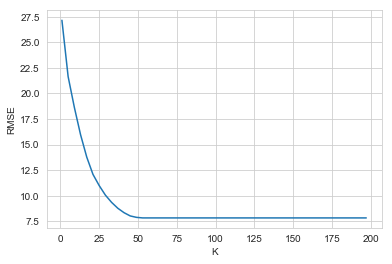

In [261]:
scores_df = find_optimize_value_of_k_SVD(user_assessment_scores, 'user_handle', 'assessment_tag', 'user_assessment_score')
sns.lineplot(x = 'K', y = 'RMSE', data=scores_df)

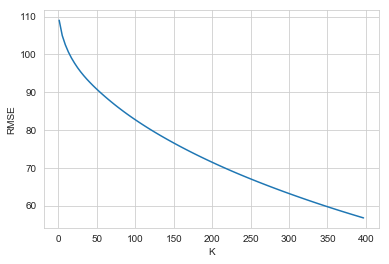

In [268]:
scores_df = find_optimize_value_of_k_SVD(cleaned_user_interest_df, 'user_handle', 'interest_tag', 'interest_val')
sns.lineplot(x = 'K', y = 'RMSE', data=scores_df)

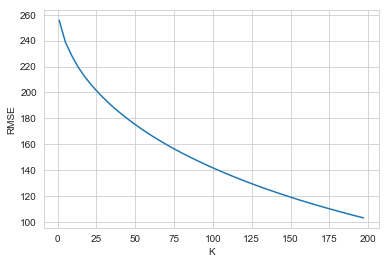

In [263]:
scores_df = find_optimize_value_of_k_SVD(meaned_group_user_courses_tag, 'user_handle', 'course_tags', 'view_time_seconds')
sns.lineplot(x = 'K', y = 'RMSE', data=scores_df)

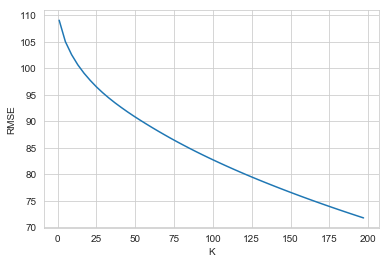

In [265]:
scores_df = find_optimize_value_of_k_SVD(meaned_group_users_courses, 'user_handle', 'course_id', 'view_time_seconds')
sns.lineplot(x = 'K', y = 'RMSE', data=scores_df)

In [309]:
TOP_CUTOFF_USERS = 10

# Class for similarity measure.
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

class SimilarityMeasure:
    def __initialize_matrix(self):
        if self.__values_column is None:
            self.__dataframe['temp_val'] = 1
            self.__values_column = 'temp_val'
        self.__scores_matrix = self.__dataframe.pivot(index = self.__index_column, columns= self.__columns_column, 
                                            values = self.__values_column)
        self.__scores_matrix = self.__scores_matrix.fillna(0)
        self.index_values = self.__scores_matrix.index.values
        # we need reindexed to calclulate the cosine similarities
        self.__reindexed_scores_matrix = self.__scores_matrix.copy()
        self.__reindexed_scores_matrix.index = range(0, self.index_values.shape[0])
        self.pearson_similarity_martix = None
        self.cosine_similarities_matrix = None
        self.__sliced = None
        self.__knn_algo = None
    
    def calculate_pearson_similarity(self):
        self.pearson_similarity_martix = self.__scores_matrix.T.corr(method = 'pearson')
        print("Pearson similarity calculated!")
        
    # Function that taken in user handle as input and outputs most similar users based on pearson.
    def get_pearson_similar_users(self, user_handle):
        if not self.isValidUser(user_handle):
            return("Error - User not found!!")
        if self.pearson_similarity_martix is not None:
            user_handle_scores = self.pearson_similarity_martix[user_handle]
            similar_users = user_handle_scores.sort_values(ascending = False)[1:TOP_CUTOFF_USERS]
            return similar_users
        else :
            print("Error - Pearson similarity not calculated!!!!")
    
    # Function to calculate cosine similarity.
    def calculate_cosine_similarity(self):
        A_sparse = sparse.csr_matrix(self.__reindexed_scores_matrix)
        self.cosine_similarities_matrix = cosine_similarity(A_sparse, dense_output = False)
        print("Cosine similarity calculated!")
    
    # Function that taken in user handle as input and outputs most similar users based on pearson.
    def get_cosine_similar_users(self, user_handle):
        if not self.isValidUser(user_handle):
            return("Error - User not found!!")
        if self.cosine_similarities_matrix is not None:
            idx = np.where(self.index_values == user_handle)
            print(idx)
            scores = pd.DataFrame(self.cosine_similarities_matrix[idx].T.toarray(), index = self.index_values)
            similar_users = scores.sort_values(by=[0], ascending = False)[1:TOP_CUTOFF_USERS]
            return similar_users
        else :
            print("Error - Cosine similarity not caclculated!!!!")
        
    def calculate_svd_similarity(self, full_matrix = False, dim_size = 20):
        scores_mean = np.asarray([(np.mean(self.__reindexed_scores_matrix, 1))]).T
        normalised_mat = self.__reindexed_scores_matrix - scores_mean
        A = normalised_mat.T
        # Using svd
        U, S, V = np.linalg.svd(A, full_matrices = full_matrix)
        #Reducing the dimensions
        self.__sliced = V.T[:, :dim_size]
        self.__magnitude = np.sqrt(np.einsum('ij, ij -> i', self.__sliced, self.__sliced))
        print("SVD similarity calculated!")

        
    def get_svd_similar_users(self, user_handle):
        if not self.isValidUser(user_handle):
            return("Error - User not found!!")
        if self.__sliced is not None:
            index = np.where(self.index_values == user_handle)[0][0] # we need index as int not array
            user_row = self.__sliced[index, :]
            similarity = np.dot(user_row, self.__sliced.T) / (self.__magnitude[index] * self.__magnitude)
            scores = pd.DataFrame(similarity, index = self.index_values)
            similar_users = scores.sort_values(by=[0], ascending = False)[1:TOP_CUTOFF_USERS]
            return similar_users
        else :
            print("Error - SVD Similarity not calculated!!!!")
    
    
    # Function that taken in user handle as input and outputs most similar users based on pearson.
    def train_KNN_BaseLine(self):
        reader = Reader(rating_scale=(self.__dataframe[self.__values_column].min(), 
                                      self.__dataframe[self.__values_column].max()))
        data = Dataset.load_from_df(self.__dataframe[[self.__index_column, self.__columns_column, 
                                                      self.__values_column]], reader) 
        sim_options = {'name': 'pearson_baseline'}
        self.__knn_algo = KNNWithMeans(sim_options)
        # Train the algorithm on the trainset, and predict ratings for the testset
        self.__knn_algo.fit(data.build_full_trainset())
    
    def get_KNN_similar_users(self, user_handle):
        if not self.isValidUser(user_handle):
            return("Error - User not found!!")
        if self.__knn_algo is not None:
            index = np.where(self.index_values == user_handle)[0][0] # we need index as int not array
            index_neighbor_users = self.__knn_algo.get_neighbors(index, k = TOP_CUTOFF_USERS)
            print(index_neighbor_users)
            print(self.__knn_algo.sim[index, index_neighbor_users])
            
            scores = pd.DataFrame(self.__knn_algo.sim[index].T, index = self.index_values)
            similar_users = scores.sort_values(by=[0], ascending = False)[1:TOP_CUTOFF_USERS]
            return similar_users
        else :
            print("Error - SVD Similarity not calculated!!!!")
    
    def isValidUser(self, user_handle):
        return ((self.index_values == user_handle).sum() > 0)
    
    def __init__(self, parameters):
        self.__dataframe = parameters['dataframe'].copy()
        self.__index_column = parameters['index_column']
        # The column in dataframe which will be used to created columns in matrix
        self.__columns_column = parameters['columns_column']
        if 'values_column' in parameters:
            self.__values_column = parameters['values_column']
        else:
            self.__values_column = None
        self.__initialize_matrix()

In [310]:
user_assessment_similarity_measure = SimilarityMeasure({
                                'dataframe' : user_assessment_scores,
                                'index_column' : 'user_handle', 'columns_column' : 'assessment_tag',
                                'values_column' : 'user_assessment_score'
                                })
user_assessment_similarity_measure.train_KNN_BaseLine()
user_assessment_similarity_measure.calculate_cosine_similarity()
user_assessment_similarity_measure.calculate_svd_similarity()

Computing the msd similarity matrix...
Done computing similarity matrix.
Cosine similarity calculated!
SVD similarity calculated!


In [311]:
print(user_assessment_similarity_measure.get_cosine_similar_users('8887'))
print(user_assessment_similarity_measure.get_svd_similar_users('8887'))
print(user_assessment_similarity_measure.get_KNN_similar_users('8887'))

(array([2752], dtype=int64),)
             0
9460  0.841721
8412  0.789517
5236  0.788519
5694  0.766058
1494  0.763504
4048  0.729360
840   0.709927
9177  0.703223
7997  0.696422
             0
8412  0.872304
5694  0.792410
5236  0.774964
9460  0.767698
840   0.758704
9177  0.752271
1494  0.748666
7246  0.746476
7997  0.744728
[435, 1890, 2448, 3072, 50, 52, 1011, 1057, 1741, 1776]
[1.  1.  1.  1.  0.5 0.5 0.5 0.5 0.5 0.5]
        0
988   1.0
2233  1.0
8074  1.0
6395  1.0
9467  0.5
6060  0.5
1095  0.5
1097  0.5
9872  0.5


C:\Python27\lib\site-packages\ipykernel_launcher.py:76: RuntimeWarning: invalid value encountered in divide
